In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [54]:
data = np.load('result_p_abs_stable.npz')

colors = ['#000000', '#F0E442', '#CC79A7', '#D55E00', '#56B4E9', '#0072B2','#E69F00']

rate_scores = data['rate_scores']
pref_scores = data['pref_scores']

print('(p_abs, env, trainitr, run)')
print(rate_scores.shape)

(p_abs, env, trainitr, run)
(5, 10, 10, 20)


In [55]:
alpha = 0.4999
val_set = [0,1,2,3,4,5,6,7,8,9]
#test_set = [6,7,8,9]


selector = (alpha * rate_scores[:,val_set,:,:]) < ((1 - alpha) * pref_scores[:,val_set,:,:])

avg = np.mean(selector, axis=(1,2,3))

TPR = avg[4]
FPR = avg[0]

In [56]:
print(rate_scores[0,0,0,:])
print(pref_scores[0,0,0,:])

[0.00603945 0.11838798 0.06481311 0.04122609 0.01620323 0.1320125
 0.00036676 0.16596387 0.00483021 0.0495471  0.06450705 0.17054832
 0.00650932 0.14651464 0.02049407 0.05678889 0.00059333 0.05417669
 0.08615072 0.09488956]
[0.04792679 0.08047209 0.04777559 0.04826648 0.11543052 0.08199191
 0.04903663 0.10190685 0.0492521  0.05044666 0.02183905 0.10611937
 0.04247525 0.07149598 0.01848223 0.06587833 0.04593313 0.05032464
 0.06018567 0.05748336]


Text(0, 0.5, 'True Positive Rate')

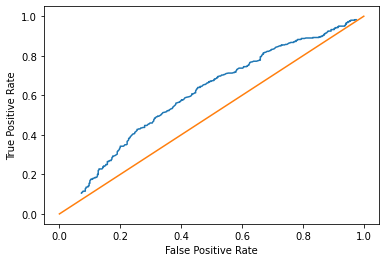

In [74]:
val_set = [0,1,2,3,4,5,6,7,8,9]
train_itr = 1

alphas = np.arange(0.0, 1.0, 0.001)

TPR = []
FPR = []
for alpha in alphas:
    selector = (alpha * rate_scores[:,val_set,train_itr,:]) > ((1 - alpha) * pref_scores[:,val_set,train_itr,:])

    avg = np.mean(selector, axis=(1,2))

    TPR += [np.mean(avg[3:5])]
    FPR += [np.mean(avg[0:2])]
    
plt.plot(FPR, TPR)
plt.plot([0,1], [0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

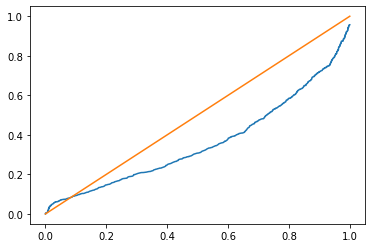